#Results
Bankruptcy data
The bankruptcy data has 6819 rows and 96 columns. The data does not have the mission values.
I have used two criterions to remove the irrelevant columns.
1.	The columns for which the correlation is high than 0.7, one of those two variables is removed.
2.	The columns in which there are only 2 to 5 different values (numeric columns) means that variance is very low, are removed from the data.
For the rows which has more than 10 missing values, are removed from the data. Finally, I have 67 columns and 6819 rows. The outliers, which are away by more than 2*SD from the mean are winsorized at the 95% level.
For most of the variables the data does not seem normal also evident in the box-plot and histogram. The t-stats for the equality of mean suggest that the data does not have same mean and most of the columns are linearly dependent as suggested by chi-square test.
Standard Transformation is applied to data to stabilized the variance and make the data ready for statistical analysis.

Machine Learning algorithms are applied in two stages.
1.	In the first sage the issue of class imbalance is not addressed. Eleven different machine learning algorithms are applied and four different scenarios are considered
a.	without focusing the cross validation (CV) and features selection.
b.	Only cross validation (CV: Stratified K-Fold) is considered
c.	Only feature selection (random forest based algorithm is used) criterion is considered
d.	Both cross validation (CV: Stratified K-Fold) and features selection (random forest based algorithm is used) are considered.
The results of this stage indicate that
•	With the application of CV the precision and accuracy increase in comparison to the bench mark category which is (without CV and RFFS)
•	The performance in terms all four criterions (precision, recall, AUC and accuracy) worsens with the application of features selection criterion in comparison to the benchmark category
•	The final Selected Features are [" Net Income to Stockholder's Equity", ' Degree of Financial Leverage (DFL)', ' Equity to Liability', ' Borrowing dependency', ' Working Capital/Equity', ' Net Value Per Share (B)', ' Total expense/Assets', ' Debt ratio %', ' ROA(C) before interest and depreciation before interest']
•	With the application of both CV and RFFS criterions, almost all 11 algorithms outperform the benchmark as well as the other two categories.
•	 The best performing algorithm seems to be the Random Forest.
2.	In the second stage the class imbalance issue is resolved through SMOT oversampling (to increase the under sampled category which is Bankruptcy=1). The results show that 

Original data shape: (6819, 67)
Resampled data shape: (13198, 67)
The above four different scenarios are considered
a.	without focusing the cross validation (CV) and features selection.
b.	Only cross validation (CV: Stratified K-Fold) is considered
c.	Only feature selection (random forest based algorithm is used) criterion is considered
d.	Both cross validation (CV: Stratified K-Fold) and features selection (random forest based algorithm is used) are considered.
The results of this stage indicate that
•	With the application of CV the precision and accuracy increase in comparison to the bench mark category which is (without CV and RFFS)
•	The performance in terms all four criterions (precision, recall, AUC and accuracy) worsens a little bit with the application of features selection criterion in comparison to the benchmark category
•	Selected Features are [" Net Income to Stockholder's Equity", ' Degree of Financial Leverage (DFL)', ' Equity to Liability', ' Borrowing dependency', ' Working Capital/Equity', ' Net Value Per Share (B)', ' Total expense/Assets', ' Debt ratio %', ' ROA(C) before interest and depreciation before interest']
•	With the application of both CV and RFFS criterions, almost all 11 algorithms underperform the benchmark as well as the other two categories.
•	 The best performing algorithm seems to be the Random Forest followed by KNN.


Overall it seems that 
•	With the application of SMOT oversampling the performance improves in comparison to the strategy of without addressing the class imbalancing issue.
•	The Random forest outperforms all the remaining algorithms.


In [1]:
import TempML1 as template
from sklearn.model_selection import train_test_split

In [2]:
FILE_NAME = "bankruptcydata.csv"
LABEL_COL = "Bankrupt"
bankruptdf = template.load_data(FILE_NAME)
display(bankruptdf.head())
print(bankruptdf.shape)
print(bankruptdf.dtypes)

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


(6819, 96)
Bankrupt                                                      int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object


In [3]:
bankruptdf.isnull().sum()

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [4]:
bankruptdf = template.cleaningup(bankruptdf, to_numeric=[], cols_to_interpolate=[], cols_to_delete=[' Net Income Flag'], corr_threshold=0.7)

df is all cleaned up..


In [5]:
print(bankruptdf.dtypes)

Bankrupt                                                      int64
 ROA(C) before interest and depreciation before interest    float64
 Operating Gross Margin                                     float64
 Operating Profit Rate                                      float64
 Non-industry income and expenditure/revenue                float64
                                                             ...   
 No-credit Interval                                         float64
 Net Income to Stockholder's Equity                         float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Equity to Liability                                        float64
Length: 67, dtype: object


Shape is:
 (6819, 67)

 Columns are:
 Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
       ' Operating Gross Margin', ' Operating Profit Rate',
       ' Non-industry income and expenditure/revenue',
       ' Operating Expense Rate', ' Research and development expense rate',
       ' Cash flow rate', ' Interest-bearing debt interest rate',
       ' Tax rate (A)', ' Net Value Per Share (B)', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate',
       ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio',
       ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio',
       ' Interest Expense Ratio', ' Total debt/Total net worth',
       ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fun

[8 rows x 67 columns]


<Figure size 576x720 with 0 Axes>

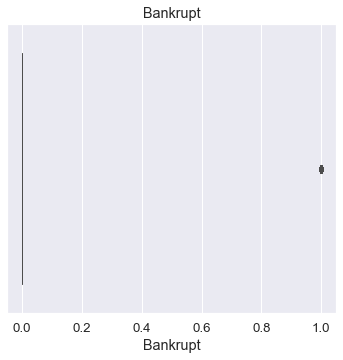

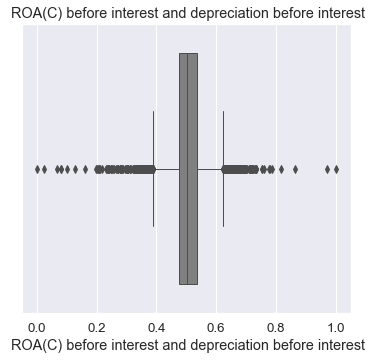

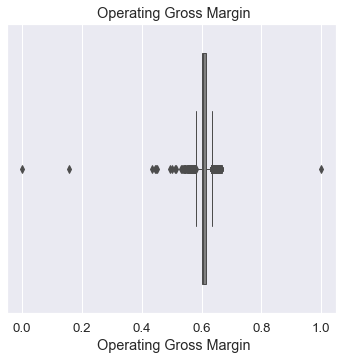

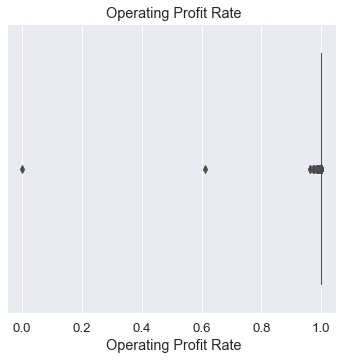

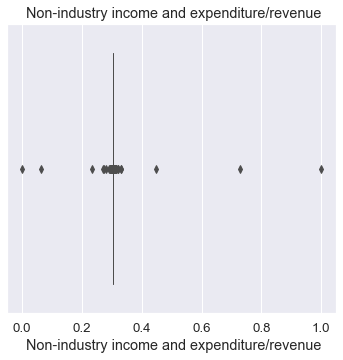

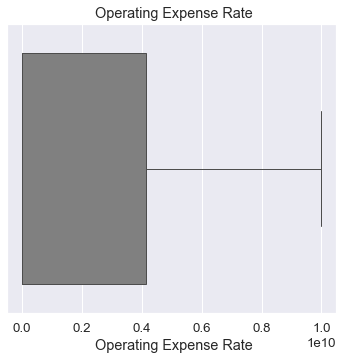

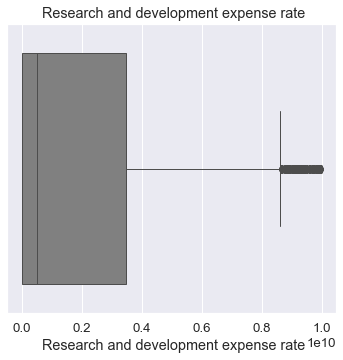

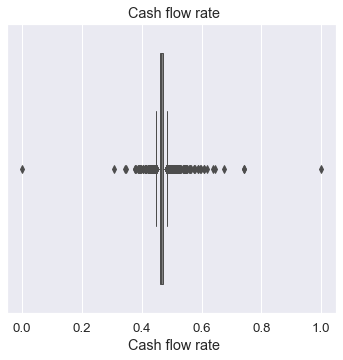

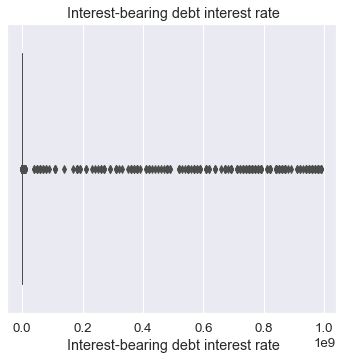

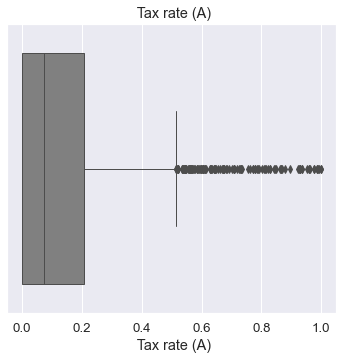

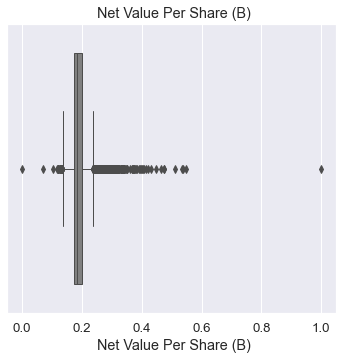

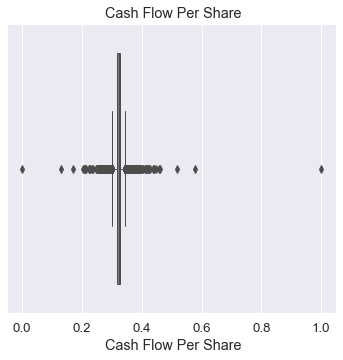

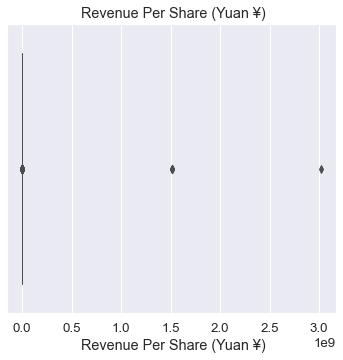

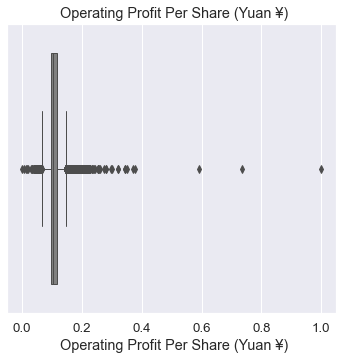

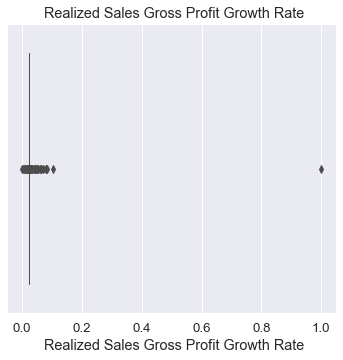

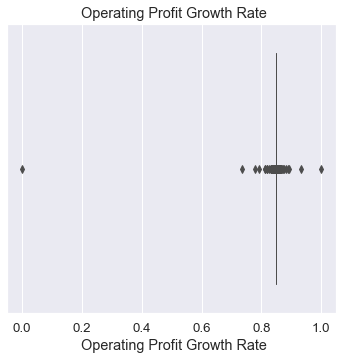

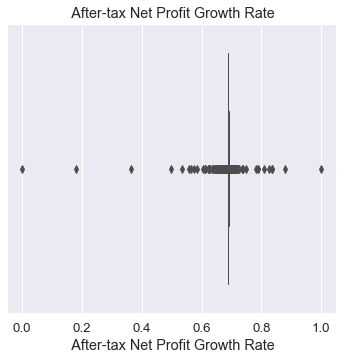

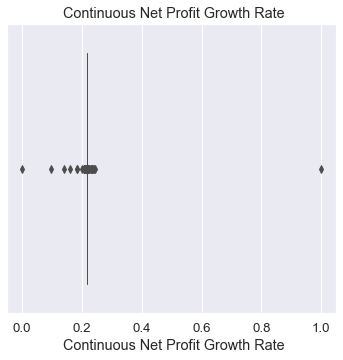

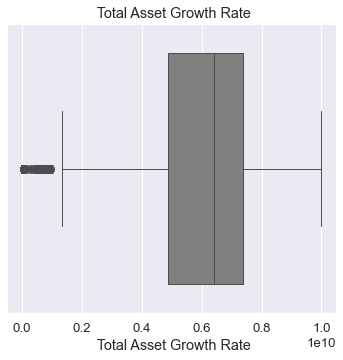

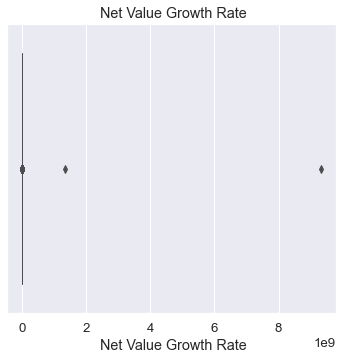

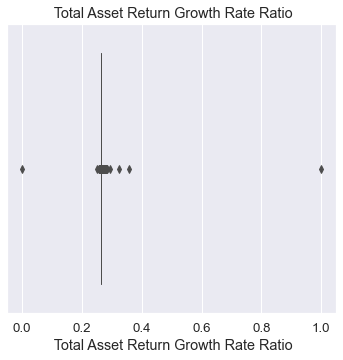

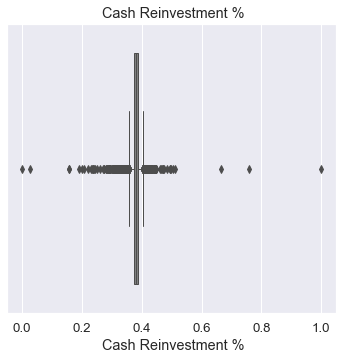

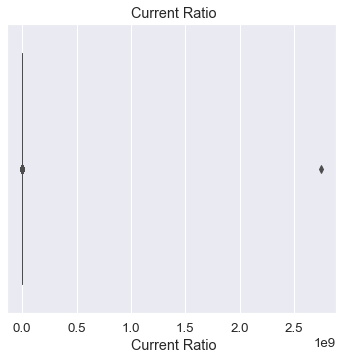

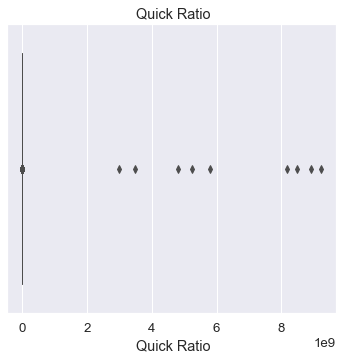

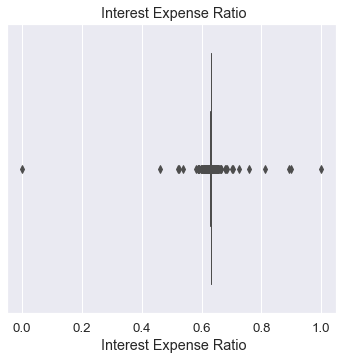

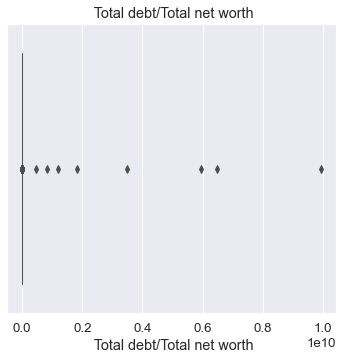

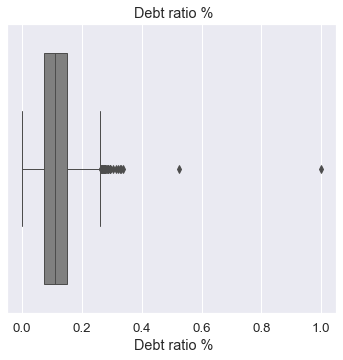

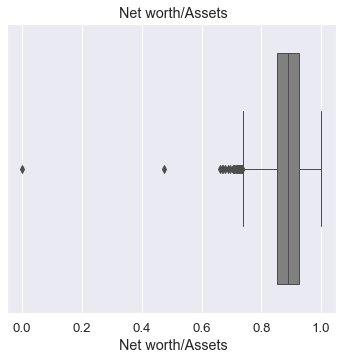

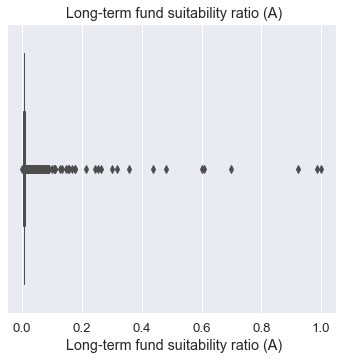

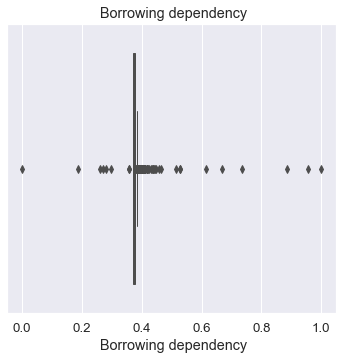

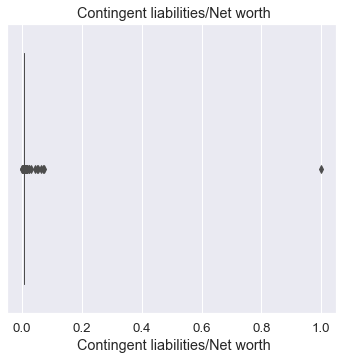

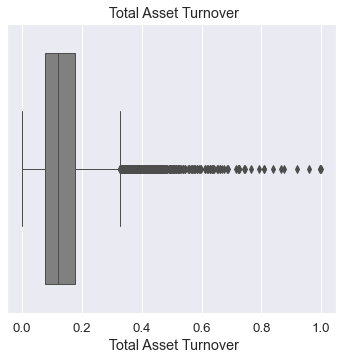

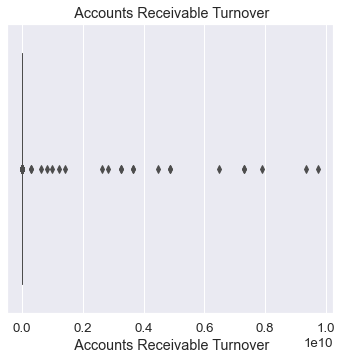

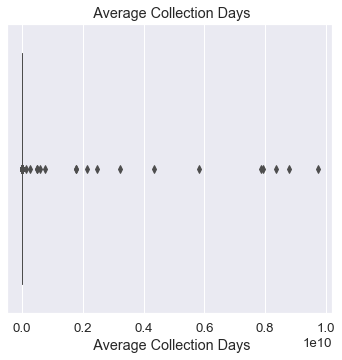

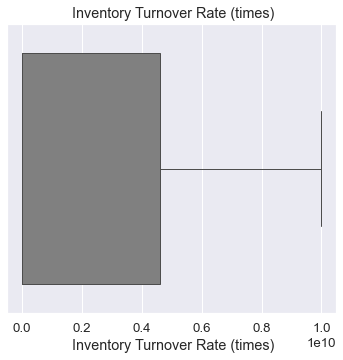

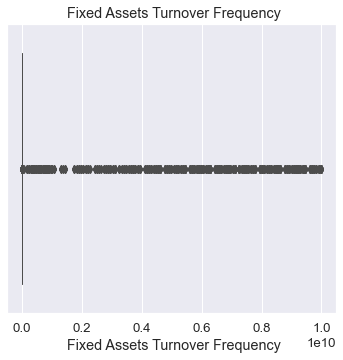

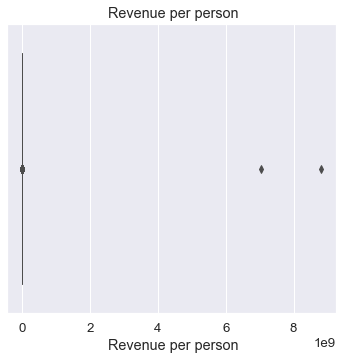

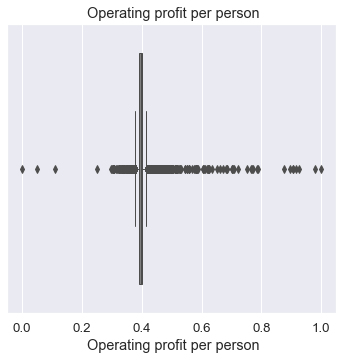

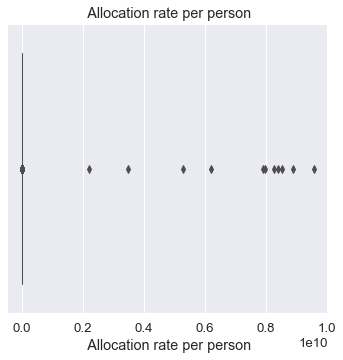

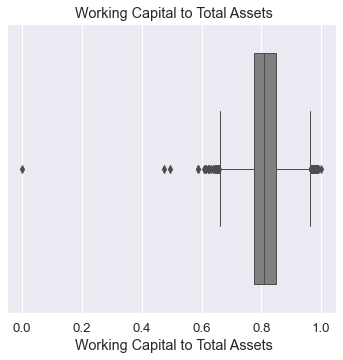

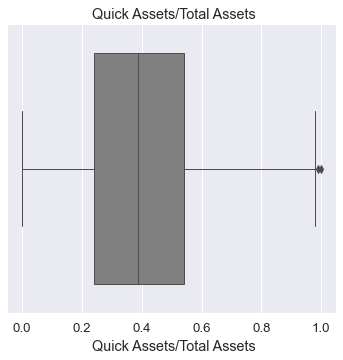

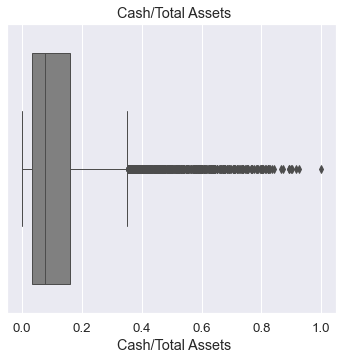

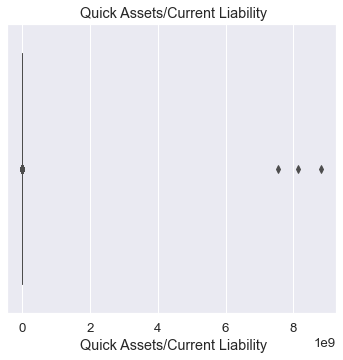

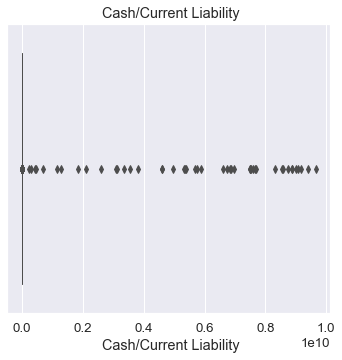

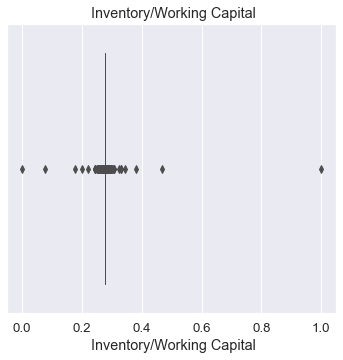

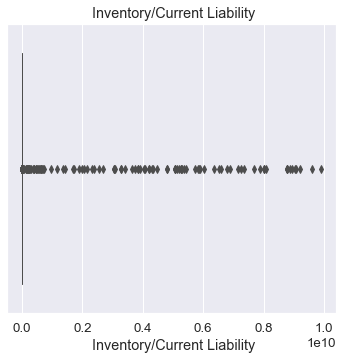

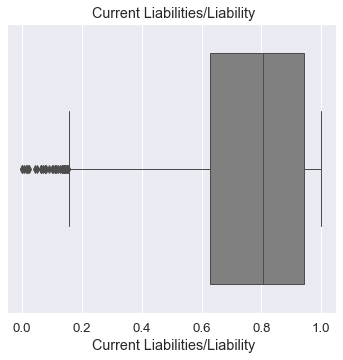

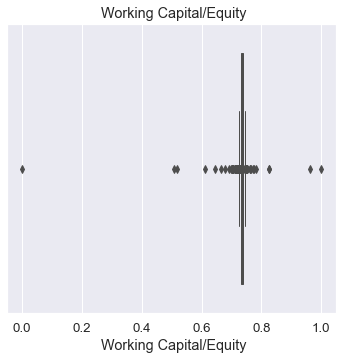

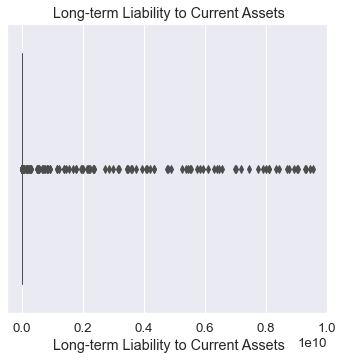

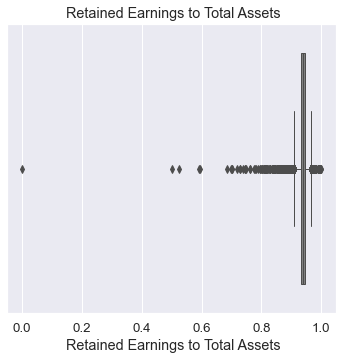

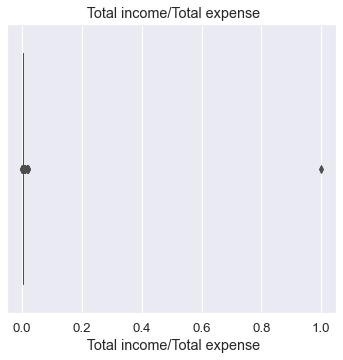

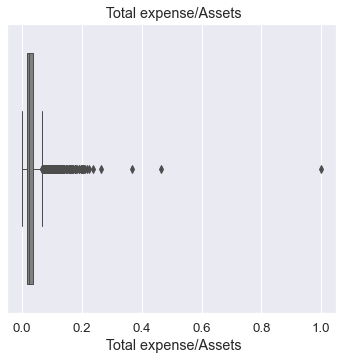

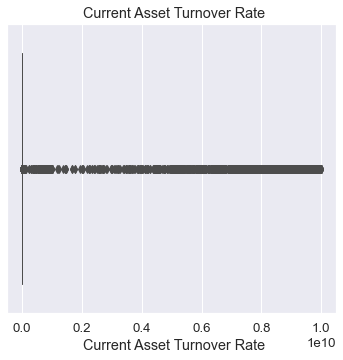

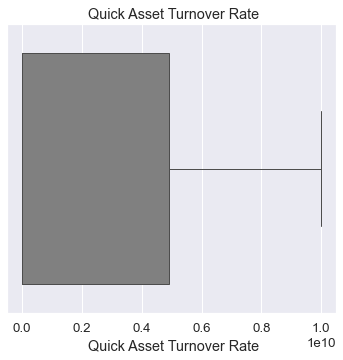

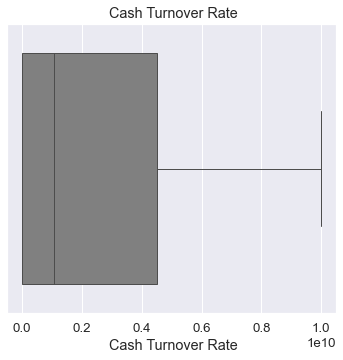

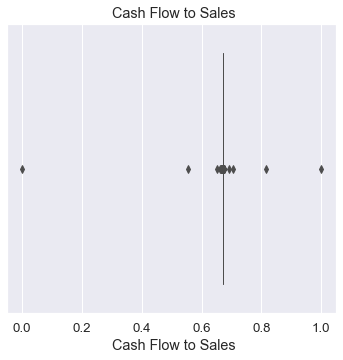

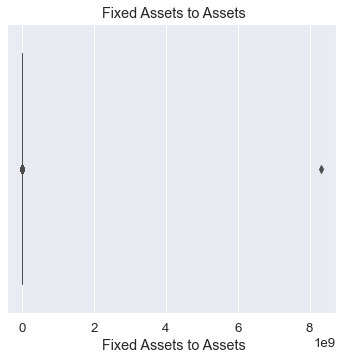

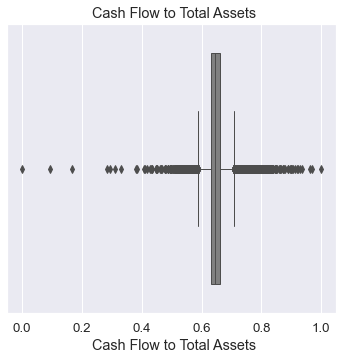

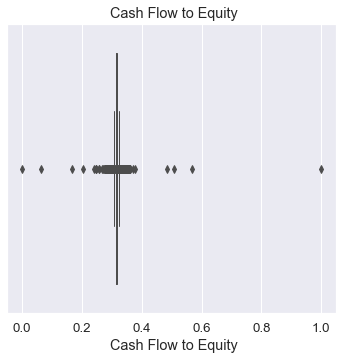

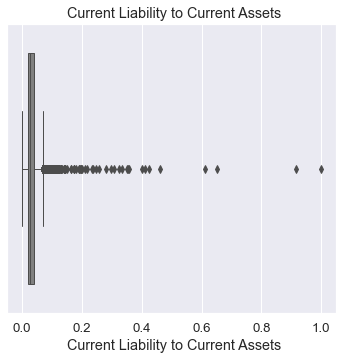

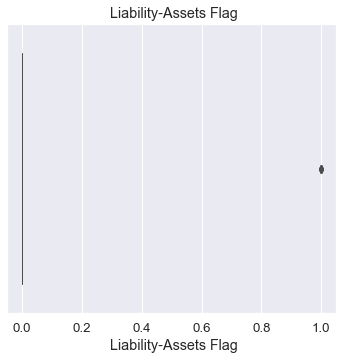

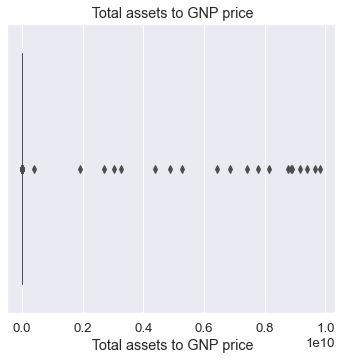

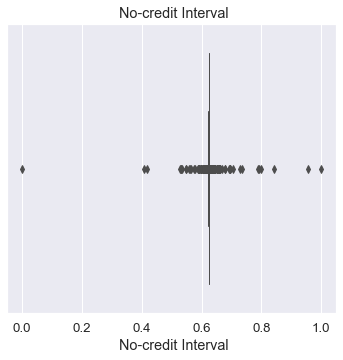

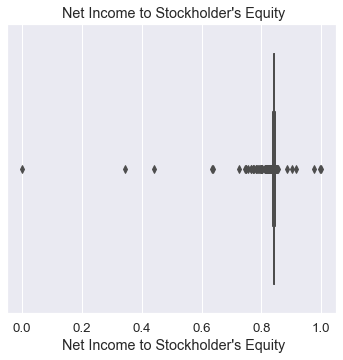

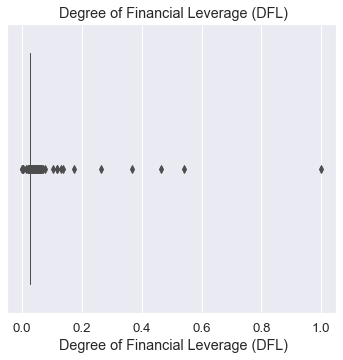

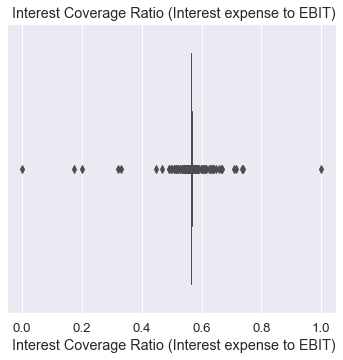

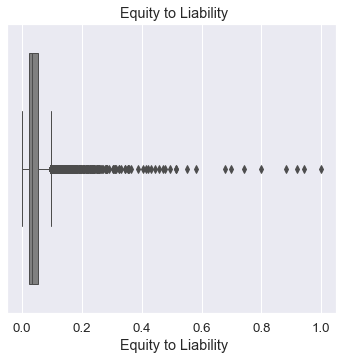

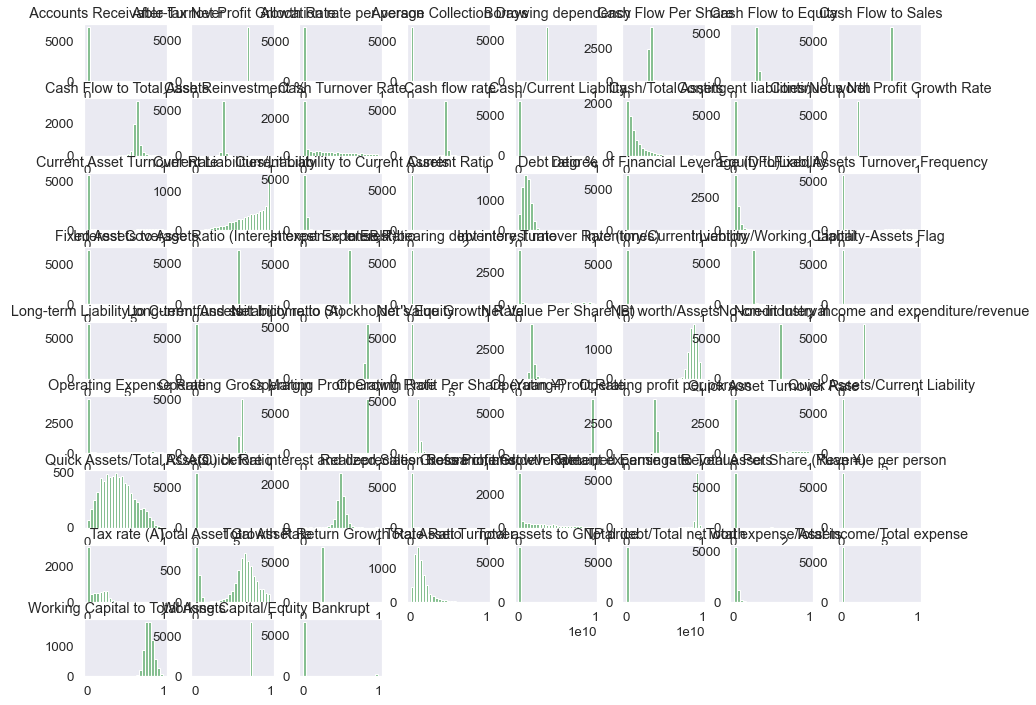

In [6]:
template.basicanalysis(bankruptdf)
template.stringcolanalysis(bankruptdf)
template.numcolanalysis(bankruptdf)

In [7]:
bankruptdf

,Bankrupt,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256970e-04,0.000000e+00,0.458143,7.250730e-04,0.000000,...,0.637555,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897850e-04,0.000000e+00,0.461867,6.470650e-04,0.000000,...,0.641100,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361300e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,...,0.642765,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078890e-04,0.000000e+00,0.465705,4.490450e-04,0.000000,...,0.579039,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860690e-04,0.000000,...,0.622374,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.604455,0.998992,0.303510,1.510210e-04,4.500000e+09,0.463734,1.790180e-04,0.113372,...,0.639806,0.314063,0.027951,0,0.000466,0.623620,0.840359,0.027064,0.566193,0.029890
6815,0,0.475162,0.598308,0.998992,0.303520,5.220000e+09,1.440000e+09,0.461978,2.370240e-04,0.371596,...,0.642072,0.314446,0.031470,0,0.001959,0.623931,0.840306,0.027009,0.566018,0.038284
6816,0,0.472725,0.610444,0.998984,0.303512,2.509310e-04,1.039090e-04,0.472189,0.000000e+00,0.490839,...,0.631678,0.313353,0.007542,0,0.002840,0.624156,0.840138,0.026791,0.565158,0.097649
6817,0,0.506264,0.607850,0.999074,0.303498,1.236150e-04,2.510000e+09,0.476123,2.110210e-04,0.181294,...,0.684857,0.320118,0.022916,0,0.002837,0.623957,0.841084,0.026822,0.565302,0.044009


In [8]:
bankruptdf.columns

Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
       ' Operating Gross Margin', ' Operating Profit Rate',
       ' Non-industry income and expenditure/revenue',
       ' Operating Expense Rate', ' Research and development expense rate',
       ' Cash flow rate', ' Interest-bearing debt interest rate',
       ' Tax rate (A)', ' Net Value Per Share (B)', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate',
       ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio',
       ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio',
       ' Interest Expense Ratio', ' Total debt/Total net worth',
       ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)', ' Borrowing 

In [9]:
bankruptdf['Bankrupt']

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt, Length: 6819, dtype: int64

In [10]:
bankruptdf.isnull().sum()

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 Operating Gross Margin                                     0
 Operating Profit Rate                                      0
 Non-industry income and expenditure/revenue                0
                                                           ..
 No-credit Interval                                         0
 Net Income to Stockholder's Equity                         0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Length: 67, dtype: int64

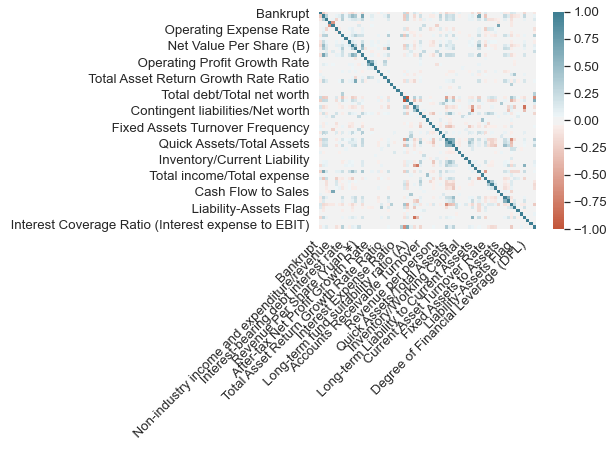

In [11]:
template.correlation_anlysis(bankruptdf)


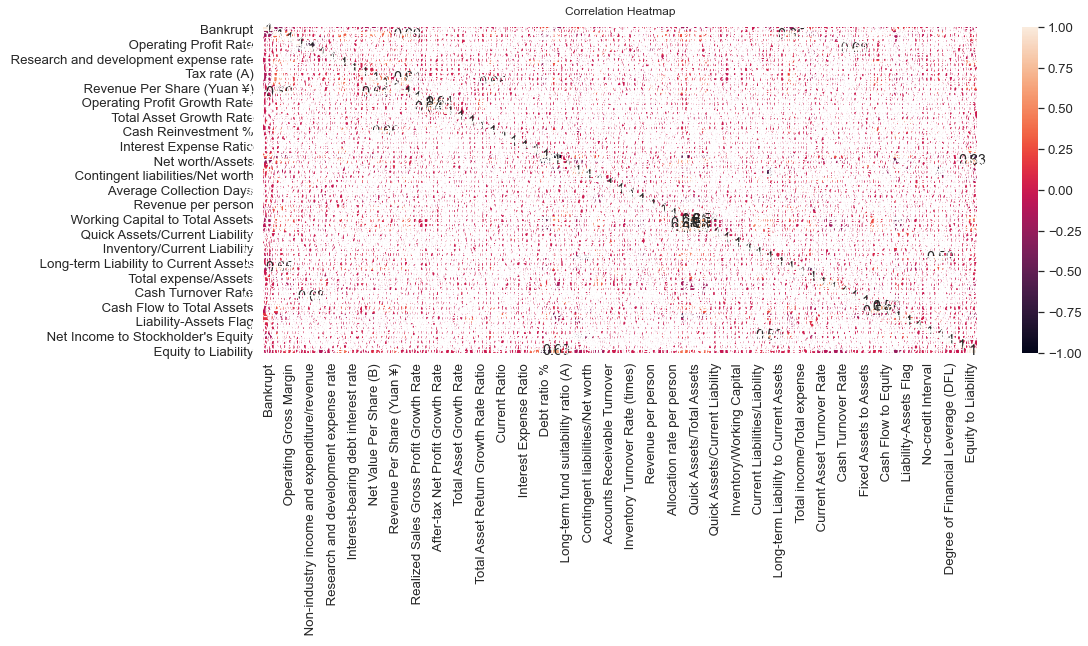

In [12]:
template.correlation(bankruptdf)


In [13]:
template.t_test(bankruptdf)


t-test for equality of mean between all numric columns
['Bankrupt', ' ROA(C) before interest and depreciation before interest', ' Operating Gross Margin', ' Operating Profit Rate', ' Non-industry income and expenditure/revenue', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net worth',

( Operating Gross Margin, Current Liability to Current Assets) => t-value=1352.7865977524702, p-value=0.0
( Operating Gross Margin, Liability-Assets Flag) => t-value=1311.8937499386245, p-value=0.0
( Operating Gross Margin, Total assets to GNP price) => t-value=-4.086506966415483, p-value=4.40423276785305e-05
( Operating Gross Margin, No-credit Interval) => t-value=-63.01437471261241, p-value=0.0
( Operating Gross Margin, Net Income to Stockholder's Equity) => t-value=-860.462648444981, p-value=0.0
( Operating Gross Margin, Degree of Financial Leverage (DFL)) => t-value=2077.4941987830684, p-value=0.0
( Operating Gross Margin, Interest Coverage Ratio (Interest expense to EBIT)) => t-value=163.73605121512963, p-value=0.0
( Operating Gross Margin, Equity to Liability) => t-value=876.3524231078521, p-value=0.0
( Operating Profit Rate, Non-industry income and expenditure/revenue) => t-value=3348.4237765627195, p-value=0.0
( Operating Profit Rate, Operating Expense Rate) => t-value=-50.8914

( Research and development expense rate, Inventory/Current Liability) => t-value=58.75738112232041, p-value=0.0
( Research and development expense rate, Current Liabilities/Liability) => t-value=61.98723032431297, p-value=0.0
( Research and development expense rate, Working Capital/Equity) => t-value=61.987230325132366, p-value=0.0
( Research and development expense rate, Long-term Liability to Current Assets) => t-value=58.864834749686196, p-value=0.0
( Research and development expense rate, Retained Earnings to Total Assets) => t-value=61.98723031881054, p-value=0.0
( Research and development expense rate, Total income/Total expense) => t-value=61.987230348436604, p-value=0.0
( Research and development expense rate, Total expense/Assets) => t-value=61.987230347590106, p-value=0.0
( Research and development expense rate, Current Asset Turnover Rate) => t-value=16.246260104502813, p-value=8.458517342739561e-59
( Research and development expense rate, Quick Asset Turnover Rate) => t-val

( Net Value Per Share (B), No-credit Interval) => t-value=-1005.5451399565566, p-value=0.0
( Net Value Per Share (B), Net Income to Stockholder's Equity) => t-value=-1473.5509129526802, p-value=0.0
( Net Value Per Share (B), Degree of Financial Leverage (DFL)) => t-value=365.20694593233753, p-value=0.0
( Net Value Per Share (B), Interest Coverage Ratio (Interest expense to EBIT)) => t-value=-861.6512394214823, p-value=0.0
( Net Value Per Share (B), Equity to Liability) => t-value=196.47934183665689, p-value=0.0
( Cash Flow Per Share, Revenue Per Share (Yuan ¥)) => t-value=-2.121864585683343, p-value=0.0338670922713846
( Cash Flow Per Share, Operating Profit Per Share (Yuan ¥)) => t-value=536.0090573598518, p-value=0.0
( Cash Flow Per Share, Realized Sales Gross Profit Growth Rate) => t-value=1164.19575567624, p-value=0.0
( Cash Flow Per Share, Operating Profit Growth Rate) => t-value=-2099.045287347015, p-value=0.0
( Cash Flow Per Share, After-tax Net Profit Growth Rate) => t-value=-13

( Operating Profit Growth Rate, Total assets to GNP price) => t-value=-4.086506913762613, p-value=4.404233765663934e-05
( Operating Profit Growth Rate, No-credit Interval) => t-value=1133.0925870783046, p-value=0.0
( Operating Profit Growth Rate, Net Income to Stockholder's Equity) => t-value=34.630310181377524, p-value=6.112815736855461e-252
( Operating Profit Growth Rate, Degree of Financial Leverage (DFL)) => t-value=3565.2724885131925, p-value=0.0
( Operating Profit Growth Rate, Interest Coverage Ratio (Interest expense to EBIT)) => t-value=1369.9156613824514, p-value=0.0
( Operating Profit Growth Rate, Equity to Liability) => t-value=1292.0147860767422, p-value=0.0
( After-tax Net Profit Growth Rate, Continuous Net Profit Growth Rate) => t-value=2273.9935510922937, p-value=0.0
( After-tax Net Profit Growth Rate, Total Asset Growth Rate) => t-value=-156.9660786430463, p-value=0.0
( After-tax Net Profit Growth Rate, Net Value Growth Rate) => t-value=-1.1329195701440327, p-value=0.25

( Cash Reinvestment %, Quick Assets/Total Assets) => t-value=-8.318387648457163, p-value=9.756543285119537e-17
( Cash Reinvestment %, Cash/Total Assets) => t-value=149.91012789706312, p-value=0.0
( Cash Reinvestment %, Quick Assets/Current Liability) => t-value=-1.7287631544801632, p-value=0.08387412806096618
( Cash Reinvestment %, Cash/Current Liability) => t-value=-6.012666142770708, p-value=1.8715932328874545e-09
( Cash Reinvestment %, Inventory/Working Capital) => t-value=363.59757027341544, p-value=0.0
( Cash Reinvestment %, Inventory/Current Liability) => t-value=-7.917463035311076, p-value=2.6105040149175855e-15
( Cash Reinvestment %, Current Liabilities/Liability) => t-value=-151.83383131750276, p-value=0.0
( Cash Reinvestment %, Working Capital/Equity) => t-value=-1235.7380090806914, p-value=0.0
( Cash Reinvestment %, Long-term Liability to Current Assets) => t-value=-7.842568209496165, p-value=4.74085608091312e-15
( Cash Reinvestment %, Retained Earnings to Total Assets) => t

( Net worth/Assets, Cash Turnover Rate) => t-value=-69.46417115222677, p-value=0.0
( Net worth/Assets, Cash Flow to Sales) => t-value=324.87383591871156, p-value=0.0
( Net worth/Assets, Fixed Assets to Assets) => t-value=-0.9999994775652763, p-value=0.31732850534918783
( Net worth/Assets, Cash Flow to Total Assets) => t-value=272.77855064300434, p-value=0.0
( Net worth/Assets, Cash Flow to Equity) => t-value=850.6084054025956, p-value=0.0
( Net worth/Assets, Current Liability to Current Assets) => t-value=1137.0024779134394, p-value=0.0
( Net worth/Assets, Liability-Assets Flag) => t-value=1145.051074337703, p-value=0.0
( Net worth/Assets, Total assets to GNP price) => t-value=-4.086506905242118, p-value=4.404233927133639e-05
( Net worth/Assets, No-credit Interval) => t-value=392.5683350675396, p-value=0.0
( Net worth/Assets, Net Income to Stockholder's Equity) => t-value=68.64584722021937, p-value=0.0
( Net worth/Assets, Degree of Financial Leverage (DFL)) => t-value=1263.694144751181

( Inventory Turnover Rate (times), Fixed Assets Turnover Frequency) => t-value=23.054876019715117, p-value=2.0877792902501963e-115
( Inventory Turnover Rate (times), Revenue per person) => t-value=54.532120190080164, p-value=0.0
( Inventory Turnover Rate (times), Operating profit per person) => t-value=54.639483238552245, p-value=0.0
( Inventory Turnover Rate (times), Allocation rate per person) => t-value=54.13124086310807, p-value=0.0
( Inventory Turnover Rate (times), Working Capital to Total Assets) => t-value=54.63948322804047, p-value=0.0
( Inventory Turnover Rate (times), Quick Assets/Total Assets) => t-value=54.63948323856596, p-value=0.0
( Inventory Turnover Rate (times), Cash/Total Assets) => t-value=54.639483245584, p-value=0.0
( Inventory Turnover Rate (times), Quick Assets/Current Liability) => t-value=54.47214586280136, p-value=0.0
( Inventory Turnover Rate (times), Cash/Current Liability) => t-value=53.04389265168991, p-value=0.0
( Inventory Turnover Rate (times), Invent

( Cash/Total Assets, Degree of Financial Leverage (DFL)) => t-value=56.89829774580622, p-value=0.0
( Cash/Total Assets, Interest Coverage Ratio (Interest expense to EBIT)) => t-value=-260.5040701400276, p-value=0.0
( Cash/Total Assets, Equity to Liability) => t-value=42.704149922675725, p-value=0.0
( Quick Assets/Current Liability, Cash/Current Liability) => t-value=-5.148030743141838, p-value=2.668977817219977e-07
( Quick Assets/Current Liability, Inventory/Working Capital) => t-value=1.7287632036940332, p-value=0.08387411924901497
( Quick Assets/Current Liability, Inventory/Current Liability) => t-value=-7.105298772575138, p-value=1.260222020464855e-12
( Quick Assets/Current Liability, Current Liabilities/Liability) => t-value=1.7287629707142074, p-value=0.08387416096504335
( Quick Assets/Current Liability, Working Capital/Equity) => t-value=1.7287629831196618, p-value=0.08387415874379364
( Quick Assets/Current Liability, Long-term Liability to Current Assets) => t-value=-7.011665303

( Cash Flow to Sales, Cash Flow to Equity) => t-value=1839.7904418894886, p-value=0.0
( Cash Flow to Sales, Current Liability to Current Assets) => t-value=1639.914156796044, p-value=0.0
( Cash Flow to Sales, Liability-Assets Flag) => t-value=1559.9515362752593, p-value=0.0
( Cash Flow to Sales, Total assets to GNP price) => t-value=-4.086506952468116, p-value=4.4042330321659764e-05
( Cash Flow to Sales, No-credit Interval) => t-value=254.71752755708897, p-value=0.0
( Cash Flow to Sales, Net Income to Stockholder's Equity) => t-value=-807.5848832399968, p-value=0.0
( Cash Flow to Sales, Degree of Financial Leverage (DFL)) => t-value=2915.3008545537255, p-value=0.0
( Cash Flow to Sales, Interest Coverage Ratio (Interest expense to EBIT)) => t-value=541.7828324295989, p-value=0.0
( Cash Flow to Sales, Equity to Liability) => t-value=1012.6902261899894, p-value=0.0
( Fixed Assets to Assets, Cash Flow to Total Assets) => t-value=0.9999996718840939, p-value=0.3173284113136657
( Fixed Assets

In [14]:
template.Normality_test(bankruptdf)


Normality Test for all numric columns
['Bankrupt', ' ROA(C) before interest and depreciation before interest', ' Operating Gross Margin', ' Operating Profit Rate', ' Non-industry income and expenditure/revenue', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net worth', ' Total Asset Tu

In [15]:
template.ANOVA_analysis(bankruptdf)


In [ ]:
template.chisquare_test(bankruptdf)

Chisquare-test for Independence between all numric columns
(Bankrupt, ROA(C) before interest and depreciation before interest) => chisqr-value=4711.657943263736, p-value=2.903339716629181e-51
Dependent (reject H0)
(Bankrupt, Operating Gross Margin) => chisqr-value=4188.368474011214, p-value=2.745860320872226e-06
Dependent (reject H0)
(Bankrupt, Operating Profit Rate) => chisqr-value=4543.100065550073, p-value=4.1258711776804506e-38
Dependent (reject H0)
(Bankrupt, Non-industry income and expenditure/revenue) => chisqr-value=4363.260250839572, p-value=7.43095519392444e-99
Dependent (reject H0)
(Bankrupt, Operating Expense Rate) => chisqr-value=3227.6444943325732, p-value=0.0004445237966900518
Dependent (reject H0)
(Bankrupt, Research and development expense rate) => chisqr-value=1069.65948913439, p-value=1.0
Independent (H0 holds true)
(Bankrupt, Cash flow rate) => chisqr-value=5169.517164101999, p-value=0.9999110975232318
Independent (H0 holds true)
(Bankrupt, Interest-bearing debt int

(Bankrupt, Equity to Liability) => chisqr-value=6819.0, p-value=0.494306400167278
Independent (H0 holds true)
( ROA(C) before interest and depreciation before interest, Operating Gross Margin) => chisqr-value=13182299.647306703, p-value=0.0
Dependent (reject H0)
( ROA(C) before interest and depreciation before interest, Operating Profit Rate) => chisqr-value=12621011.179541346, p-value=0.0
Dependent (reject H0)
( ROA(C) before interest and depreciation before interest, Non-industry income and expenditure/revenue) => chisqr-value=9194187.269273791, p-value=0.0
Dependent (reject H0)
( ROA(C) before interest and depreciation before interest, Operating Expense Rate) => chisqr-value=10228892.263525566, p-value=0.0
Dependent (reject H0)
( ROA(C) before interest and depreciation before interest, Research and development expense rate) => chisqr-value=5603507.400438102, p-value=0.0
Dependent (reject H0)
( ROA(C) before interest and depreciation before interest, Cash flow rate) => chisqr-value=1

# Transformation

In [16]:
#bankruptdf=template.MinMax_Transformation(bankruptdf,"Bankrupt")
bankruptdf=template.Standard_Transformation(bankruptdf,"Bankrupt")

In [17]:
bankruptdf

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,-2.217909,-0.383334,0.016456,-0.087479,-0.616334,-0.750713,-0.545256,-0.151921,-0.829388,-1.279247,...,-0.206594,2.812493,-0.034272,-0.049491,-0.084274,-0.861611,-0.060031,-0.098978,-0.622067,1
1,-0.673828,0.135068,0.014671,-0.005957,-0.616334,-0.750713,-0.326632,-0.151921,-0.829388,-0.251878,...,-0.109511,0.527485,-0.034272,-0.049491,-0.021388,-0.029804,15.129816,0.364559,-0.535573,1
2,-1.303672,-0.383759,0.007858,-0.142238,-0.616334,-0.740898,-0.523098,-0.151921,-0.829388,-0.381876,...,-0.082328,-0.199721,-0.034272,-0.049491,-0.005984,-0.249820,-0.062961,-0.125015,-0.621960,1
3,-1.735886,-1.441418,-0.004257,-0.024491,-0.616334,-0.750713,-0.101310,-0.151921,-0.829388,-1.092453,...,-1.018533,1.158899,-0.034272,-0.049491,-0.080226,-0.392864,-0.053903,-0.052562,-0.471826,1
4,-0.661778,-0.541238,0.016758,-0.013254,1.820772,-0.750713,-0.275028,-0.151921,-0.829388,-0.693621,...,-0.309818,0.525867,-0.034272,-0.049491,-0.032052,-0.029564,-0.178037,0.776395,-0.241715,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-0.189395,-0.206277,0.018215,-0.010092,-0.616334,0.981322,-0.217024,-0.151921,-0.011748,-0.467701,...,-0.117240,-0.115286,-0.034272,-0.049491,-0.024011,-0.002968,-0.030437,0.063215,-0.353693,0
6815,-0.494676,-0.569328,0.018223,-0.009248,0.996048,-0.196462,-0.320132,-0.151921,1.850573,-0.279644,...,-0.087703,-0.001180,-0.034272,-0.049491,0.001317,-0.006633,-0.033992,0.049970,-0.185856,0
6816,-0.534845,0.147411,0.017628,-0.009919,-0.616334,-0.750713,0.279314,-0.151921,2.710556,2.361984,...,-0.172033,-0.776979,-0.034272,-0.049491,0.019653,-0.018166,-0.047870,-0.015101,1.001206,0
6817,0.017875,-0.005811,0.024494,-0.011175,-0.616334,0.215378,0.510249,-0.151921,0.478106,0.680833,...,0.349935,-0.278510,-0.034272,-0.049491,0.003493,0.046934,-0.045898,-0.004270,-0.071364,0


# Without Addressing Class Imbalancing

In [18]:
#without REG, CV and RFFS and addressing class imbalancing
results_without_cv_reg_rffs = template.run_algorithms(bankruptdf,"Bankrupt")

============ LogReg ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 96.26099706744868

 Precision of event Happening: 
 34.78260869565217

 Recall of event Happening: 
 18.181818181818183

 AUC: 
 0.5852272727272727

 F-Score:
 0.2388059701492537

 Confusion Matrix: 
 [[1305   15]
 [  36    8]]

============ KNN ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 96.7741935483871

 Precision of event Happening: 
 50.0

 Recall of event Happening: 
 18.181818181818183

 AUC: 
 0.5878787878787879

 F-Score:
 0.26666666666666666

 Confusion Matrix: 
 [[1312    8]
 [  36    8]]

============ GadientBoosting ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 96.62756598240469

 Precision of event Happening: 
 45.0

 Recall of event Happening: 
 20.454545454545457

 AUC: 
 0.5981060606060606

 F-Score:
 0.28125000000000006

 Confusion Matrix: 
 [[1309   11]
 [  35    9]]

============ AdaBoost ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Ac

In [19]:
#with CV and without addressing class imbalancing
results_cv = template.run_algorithms_cv(bankruptdf,"Bankrupt")

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 5939
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16574
[LightGBM] [Info] Number of data points in the train set: 6137, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032263 -> initscore=-3.401029
[LightGBM] [Info] Start training from score -3.401029
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 5939
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16574
[LightGBM] [Info] Number of data points in the train set: 6137, number of used

[03:34:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:34:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 5939
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16574
[LightGBM] [Info] Number of data

In [20]:
#with RFFS only and without addressing class imbalancing
res_rffs = template.MachineLearningwithRFFS(bankruptdf,"Bankrupt", threshold=3,
                                    algo_list=template.get_supported_algorithms())

 Net Income to Stockholder's Equity    6.383306
 Degree of Financial Leverage (DFL)    4.710478
 Equity to Liability                   4.259574
 Borrowing dependency                  4.180510
 Working Capital/Equity                3.712979
                                         ...   
 Accounts Receivable Turnover          0.000000
 Revenue per person                    0.000000
 Allocation rate per person            0.000000
 Quick Assets/Current Liability        0.000000
 Average Collection Days               0.000000
Length: 66, dtype: float64
Selected Features =[" Net Income to Stockholder's Equity", ' Degree of Financial Leverage (DFL)', ' Equity to Liability', ' Borrowing dependency', ' Working Capital/Equity', ' Net Value Per Share (B)', ' Total expense/Assets', ' Debt ratio %', ' ROA(C) before interest and depreciation before interest']
(6819, 67)
============ LogReg ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 96.62756598240469

 Precision of event Happen

In [21]:
#with CV and RFFS and without addressing class imbalancing
res_rffs_cv = template.MachineLearningwithRFFS_CV(bankruptdf,"Bankrupt", threshold=3,
                                    algo_list=template.get_supported_algorithms())

 Net Income to Stockholder's Equity    9.582141
 Borrowing dependency                  4.482774
 Working Capital/Equity                4.067373
 Total income/Total expense            3.777309
 Interest Expense Ratio                3.586672
                                         ...   
 Allocation rate per person            0.000000
 Current Ratio                         0.000000
 Quick Ratio                           0.000000
 Revenue per person                    0.000000
 Average Collection Days               0.000000
Length: 66, dtype: float64
Selected Features =[" Net Income to Stockholder's Equity", ' Borrowing dependency', ' Working Capital/Equity', ' Total income/Total expense', ' Interest Expense Ratio', ' ROA(C) before interest and depreciation before interest', ' Degree of Financial Leverage (DFL)', ' Operating Profit Rate']
(6819, 67)
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negativ

[03:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [22]:
#all results without addressing class imbalancing

res_all=template.all_CImbalance(bankruptdf,"Bankrupt", algo_list=template.get_supported_algorithms(), threshold=3, feature_list=[]) 


Results without FS, REG and CV
============ LogReg ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 96.26099706744868

 Precision of event Happening: 
 34.78260869565217

 Recall of event Happening: 
 18.181818181818183

 AUC: 
 0.5852272727272727

 F-Score:
 0.2388059701492537

 Confusion Matrix: 
 [[1305   15]
 [  36    8]]

============ KNN ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 96.7741935483871

 Precision of event Happening: 
 50.0

 Recall of event Happening: 
 18.181818181818183

 AUC: 
 0.5878787878787879

 F-Score:
 0.26666666666666666

 Confusion Matrix: 
 [[1312    8]
 [  36    8]]

============ GadientBoosting ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 96.62756598240469

 Precision of event Happening: 
 45.0

 Recall of event Happening: 
 20.454545454545457

 AUC: 
 0.5981060606060606

 F-Score:
 0.28125000000000006

 Confusion Matrix: 
 [[1309   11]
 [  35    9]]

============ AdaBoost ===========
Prediction V

Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 95.16129032258065

 Precision of event Happening: 
 22.5

 Recall of event Happening: 
 20.454545454545457

 AUC: 
 0.5905303030303031

 F-Score:
 0.2142857142857143

 Confusion Matrix: 
 [[1289   31]
 [  35    9]]

============ NaiveBayes ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 96.48093841642229

 Precision of event Happening: 
 25.0

 Recall of event Happening: 
 4.545454545454546

 AUC: 
 0.5204545454545454

 F-Score:
 0.07692307692307693

 Confusion Matrix: 
 [[1314    6]
 [  42    2]]

============ MultiLayerPerceptron ===========
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 96.7741935483871

 Precision of event Happening: 
 50.0

 Recall of event Happening: 
 2.272727272727273

 AUC: 
 0.5109848484848485

 F-Score:
 0.04347826086956522

 Confusion Matrix: 
 [[1319    1]
 [  43    1]]

============ LightGbm ===========
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underline

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 5940
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16573
[LightGBM] [Info] Number of data points in the train set: 6138, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032258 -> initscore=-3.401197
[LightGBM] [Info] Start training from score -3.401197
[03:40:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XG

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 5939
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16574
[LightGBM] [Info] Number of data points in the train set: 6137, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032263 -> initscore=-3.401029
[LightGBM] [Info] Start training from score -3.401029
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 5940
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16573
[LightGBM] [Info] Number of data points in the train set: 6138, number of used

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 5939
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6137, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032263 -> initscore=-3.401029
[LightGBM] [Info] Start training from score -3.401029
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 5940
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 5940
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6138, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032258 -> initscore=-3.401197
[LightGBM] [Info] Start training from score -3.401197
============ LogReg ===========
{'accuracy': 96.86173946370052, 'precision': 62.5, 'recall': 5.909090909090909, 'auc_val': 0.5290151515151514, 'f_score': 0.10493311036789299}

============ KNN ===========
{'accuracy': 96.5684197380943, 'precision': 40.362914862914856, 'recall': 14.09090909090909, 'auc_val': 0.5670447647951441, 'f_score': 0.20636838216371028}

============ GadientBoosting ===========
{'accuracy': 96.4951920799

TypeError: unhashable type: 'dict'

#  With Adressing Class Imbalancing

In [23]:
#deep copy
bankruptdf_bal1 = bankruptdf.copy()

In [24]:
bankruptdf_bal=template.SMOT_OverSampling(bankruptdf_bal1,"Bankrupt")

In [25]:
print('Orignal data shape:', bankruptdf.shape)
print('Resampled data shape:', bankruptdf_bal.shape)



Orignal data shape: (6819, 67)
Resampled data shape: (13198, 67)


In [26]:
#without REG, CV and RFFS and with addressing class imbalancing
results_without_cv_rffs = template.run_algorithms(bankruptdf_bal,"Bankrupt")


============ LogReg ===========
Prediction Vector: 
 [1 1 0 ... 0 0 1]

 Accuracy: 
 88.48484848484848

 Precision of event Happening: 
 86.77867056245434

 Recall of event Happening: 
 90.61784897025171

 AUC: 
 0.8849929318339523

 F-Score:
 0.8865671641791044

 Confusion Matrix: 
 [[1148  181]
 [ 123 1188]]

============ KNN ===========
Prediction Vector: 
 [1 1 0 ... 1 0 1]

 Accuracy: 
 94.0909090909091

 Precision of event Happening: 
 89.36605316973414

 Recall of event Happening: 
 100.0

 AUC: 
 0.9413092550790068

 F-Score:
 0.9438444924406048

 Confusion Matrix: 
 [[1173  156]
 [   0 1311]]

============ GadientBoosting ===========
Prediction Vector: 
 [1 1 0 ... 0 0 1]

 Accuracy: 
 95.68181818181817

 Precision of event Happening: 
 93.91049156272928

 Recall of event Happening: 
 97.63539282990084

 AUC: 
 0.956950478069745

 F-Score:
 0.9573672400897533

 Confusion Matrix: 
 [[1246   83]
 [  31 1280]]

============ AdaBoost ===========
Prediction Vector: 
 [1 1 0 ... 0 0

In [27]:
#with CV only and with addressing class imbalancing
results_cv = template.run_algorithms_cv(bankruptdf_bal,"Bankrupt")


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5939, number of negative: 5939
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16590
[LightGBM] [Info] Number of data points in the train set: 11878, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5939, number of negative: 5939
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16590
[LightGBM] [Info] Number of data points in the train set: 11878, number of used features: 66
[LightGBM] [Info] [binary:BoostFromSc

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5939, number of negative: 5939
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16590
[LightGBM] [Info] Number of data points in the train set: 11878, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5939, number of negative: 5939
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16590
[LightGBM] [Info] Number of data points in the train set: 11878, number of used features: 66
[LightGBM] [Info] [binary:BoostFromSc

In [28]:
#with RFFS and with addressing class imbalancing
res_rffs = template.MachineLearningwithRFFS(bankruptdf_bal,"Bankrupt", threshold=3,
                                    algo_list=template.get_supported_algorithms())


 Net Income to Stockholder's Equity                         13.490774
 Retained Earnings to Total Assets                          10.110131
 Total income/Total expense                                  9.546315
 Borrowing dependency                                        8.942454
 ROA(C) before interest and depreciation before interest     5.800900
                                                              ...    
 Net Value Growth Rate                                       0.000000
 Current Ratio                                               0.000000
 Quick Assets/Current Liability                              0.000000
 Revenue per person                                          0.000000
 Average Collection Days                                     0.000000
Length: 66, dtype: float64
Selected Features =[" Net Income to Stockholder's Equity", ' Retained Earnings to Total Assets', ' Total income/Total expense', ' Borrowing dependency', ' ROA(C) before interest and depreciation before i

In [29]:
#with CV and RFFS and with addressing class imbalancing
res_rffs_cv = template.MachineLearningwithRFFS_CV(bankruptdf_bal,"Bankrupt", threshold=3,
                                    algo_list=template.get_supported_algorithms())



 Net worth/Assets                      12.226265
 Borrowing dependency                  12.161454
 Net Income to Stockholder's Equity     7.076109
 Total income/Total expense             6.406738
 Retained Earnings to Total Assets      6.336996
                                         ...    
 Liability-Assets Flag                  0.000000
 Fixed Assets to Assets                 0.000000
 Revenue per person                     0.000000
 Allocation rate per person             0.000000
 Quick Assets/Current Liability         0.000000
Length: 66, dtype: float64
Selected Features =[' Net worth/Assets', ' Borrowing dependency', " Net Income to Stockholder's Equity", ' Total income/Total expense', ' Retained Earnings to Total Assets', ' ROA(C) before interest and depreciation before interest', ' Interest Expense Ratio', ' Inventory/Working Capital', ' Operating Profit Per Share (Yuan ¥)', ' Debt ratio %']
(13198, 67)
[LightGBM] [Warning] Find whitespaces in feature_names, replace with under

[04:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with u

In [30]:
#all results and with addressing class imbalancing
res_all=template.all_CImbalance(bankruptdf_bal,"Bankrupt", algo_list=template.get_supported_algorithms(),
                                threshold=5, feature_list=[]) 


Results without FS, REG and CV
============ LogReg ===========
Prediction Vector: 
 [1 1 0 ... 0 0 1]

 Accuracy: 
 88.48484848484848

 Precision of event Happening: 
 86.77867056245434

 Recall of event Happening: 
 90.61784897025171

 AUC: 
 0.8849929318339523

 F-Score:
 0.8865671641791044

 Confusion Matrix: 
 [[1148  181]
 [ 123 1188]]

============ KNN ===========
Prediction Vector: 
 [1 1 0 ... 1 0 1]

 Accuracy: 
 94.0909090909091

 Precision of event Happening: 
 89.36605316973414

 Recall of event Happening: 
 100.0

 AUC: 
 0.9413092550790068

 F-Score:
 0.9438444924406048

 Confusion Matrix: 
 [[1173  156]
 [   0 1311]]

============ GadientBoosting ===========
Prediction Vector: 
 [1 1 0 ... 0 0 1]

 Accuracy: 
 95.68181818181817

 Precision of event Happening: 
 93.91049156272928

 Recall of event Happening: 
 97.63539282990084

 AUC: 
 0.956950478069745

 F-Score:
 0.9573672400897533

 Confusion Matrix: 
 [[1246   83]
 [  31 1280]]

============ AdaBoost ===========
Pred

Prediction Vector: 
 [1 1 0 ... 0 0 1]

 Accuracy: 
 92.95454545454545

 Precision of event Happening: 
 90.73135409123823

 Recall of event Happening: 
 95.57589626239512

 AUC: 
 0.9297229726588528

 F-Score:
 0.9309063893016345

 Confusion Matrix: 
 [[1201  128]
 [  58 1253]]

============ NaiveBayes ===========
Prediction Vector: 
 [0 1 0 ... 0 0 0]

 Accuracy: 
 82.31060606060606

 Precision of event Happening: 
 88.71559633027523

 Recall of event Happening: 
 73.76048817696415

 AUC: 
 0.8225270458509607

 F-Score:
 0.8054977092877967

 Confusion Matrix: 
 [[1206  123]
 [ 344  967]]

============ MultiLayerPerceptron ===========
Prediction Vector: 
 [1 1 0 ... 0 0 1]

 Accuracy: 
 87.00757575757576

 Precision of event Happening: 
 85.32846715328468

 Recall of event Happening: 
 89.16857360793287

 AUC: 
 0.8702221005453078

 F-Score:
 0.8720626631853786

 Confusion Matrix: 
 [[1128  201]
 [ 142 1169]]

============ LightGbm ===========
[LightGBM] [Warning] Find whitespaces in 

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5940, number of negative: 5939
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16590
[LightGBM] [Info] Number of data points in the train set: 11879, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500042 -> initscore=0.000168
[LightGBM] [Info] Start training from score 0.000168
[04:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:22:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XG

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5940, number of negative: 5939
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16590
[LightGBM] [Info] Number of data points in the train set: 11879, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500042 -> initscore=0.000168
[LightGBM] [Info] Start training from score 0.000168
============ LogReg ===========
{'accuracy': 87.839507661911, 'precision': 86.07413641588296, 'recall': 90.9834230008737, 'auc_val': 0.8783955258196533, 'f_score': 0.8833663493411343}

============ KNN ===========
{'accuracy': 93.65847634801388, 'precision': 88.94136323814244, 'recall': 100.0, 'auc_val': 0.9365865406722766, 'f_score': 0.9409568678097855}

============ GadientBoosting ===========
{'accuracy': 94.48435453856

[04:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:27:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:27:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

============ LogReg ===========
{'accuracy': 79.61082776207873, 'precision': 82.58799396150353, 'recall': 75.4051823239987, 'auc_val': 0.7961098082494138, 'f_score': 0.7876854245476476}

============ KNN ===========
{'accuracy': 86.86218324258505, 'precision': 84.03650087370474, 'recall': 91.48346898422771, 'auc_val': 0.868622798546926, 'f_score': 0.8752229783810961}

============ GadientBoosting ===========
{'accuracy': 88.61235554942908, 'precision': 86.4799296518965, 'recall': 91.95321193727871, 'auc_val': 0.8861240630891617, 'f_score': 0.8904904968542091}

============ AdaBoost ===========
{'accuracy': 86.24078158384451, 'precision': 84.3600513416734, 'recall': 89.40725157492987, 'auc_val': 0.8624086080838737, 'f_score': 0.8672476398873121}

============ SVM ===========
{'accuracy': 82.14929813678866, 'precision': 80.37128153134692, 'recall': 85.55826090955074, 'auc_val': 0.82149468892261, 'f_score': 0.82816138037307}

============ DecisionTree ===========
{'accuracy': 90.142871091

TypeError: unhashable type: 'dict'